<h2> 1. How are coefficients affected?</h2>

In [25]:
from sklearn.datasets import load_diabetes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

In [26]:
data = load_diabetes()

df = pd.DataFrame(data.data, columns = data.feature_names)
df['TARGET'] = data.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [27]:
# apply train_test_split method

X_train,X_test,y_train,y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=2)

In [28]:
# And then,for different values of 'alpha',"Lasso_Reg" perform krke,hr baar coeffiecients ko iss list me store krte jana hai.

In [29]:
coefs = []
r2_scores = []

for i in [0, 0.1, 1, 10]:

    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)

    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred)) 

    # we store it in the list, so that, we have to plot graph

C:\Users\munna\anaconda3\envs\profiling310\lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\munna\anaconda3\envs\profiling310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\munna\anaconda3\envs\profiling310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeC

Text(0.5, 1.0, 'Alpha=10, r2_score=-0.01')

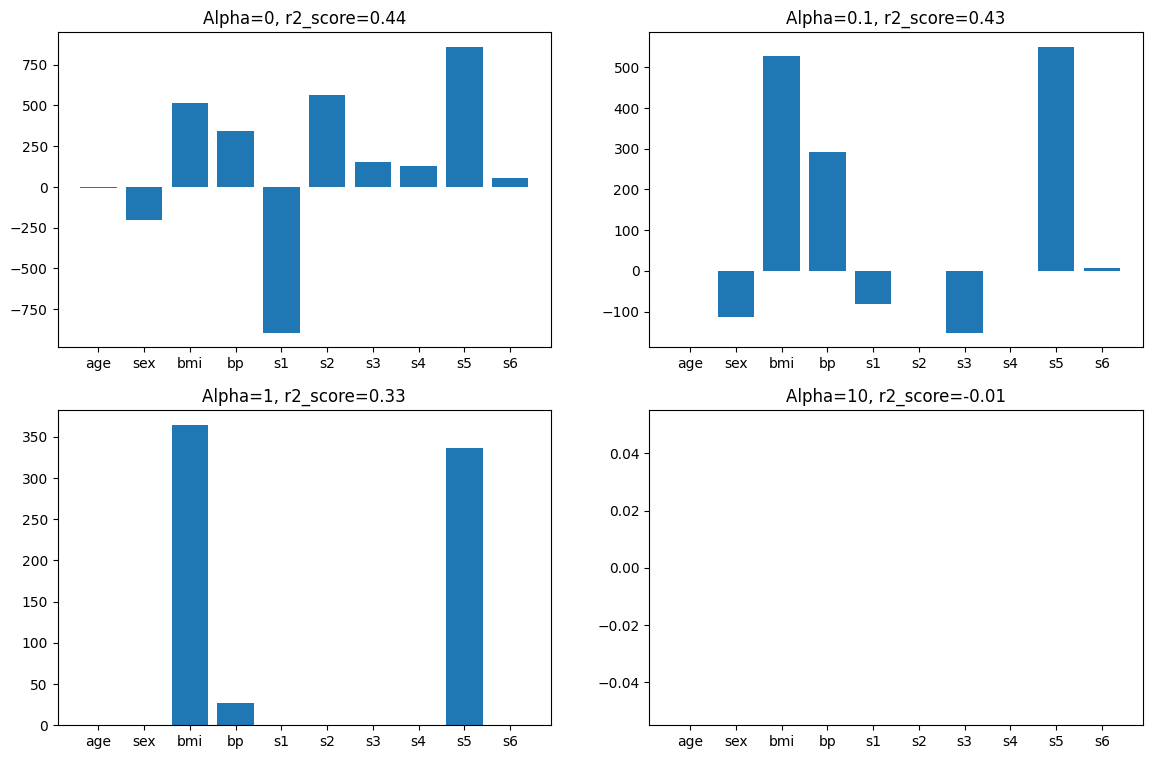

In [30]:
plt.figure(figsize=(14,9))

plt.subplot(221)
plt.bar(data.feature_names, coefs[0])
plt.title('Alpha=0, r2_score={}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names, coefs[1])
plt.title('Alpha=0.1, r2_score={}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names, coefs[2])
plt.title('Alpha=1, r2_score={}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names, coefs[3])
plt.title('Alpha=10, r2_score={}'.format(round(r2_scores[3],2)))

In [31]:
# here, we can observe that on 'alpha=0', it acts as 'LinearRegression' 
# if consider by r2_score,then,A/c to fig.2,{'age','s2','s4'} ye utne kaam ke columns nhi hai a/c to 'Lasso_Reg'.
# A/c to 'LassoReg.',sbse important columns for "feature selection" are={'bmi','bp','s5'}
# in fig.4, when we increase the value of 'alpha' too high, which is clearly case of "under-fitting"
# also, r2_score=(-ve) which clearly signifying that hmara regression bht kharab ho rha hai. 

<h2> 2. Higher Coefficients are affected more</h2>

In [32]:
# that means jo higher coefficients hai unpe jyada impact pd rha hai, jaise-jaise hm 'lambda' ki value increase kr rhe hai.

In [33]:
# Again, we do the same thing,look for different values of 'alpha'

alphas = [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

coefs = []

for i in alphas:

    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)

    coefs.append(reg.coef_.tolist())

C:\Users\munna\anaconda3\envs\profiling310\lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\munna\anaconda3\envs\profiling310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\munna\anaconda3\envs\profiling310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeC

In [34]:
# Now, we are creating a dataframe, where all 'alpha_values' is in row, and, all coeff.'s is in columns.

input_array = np.array(coefs)

coef_df = pd.DataFrame(input_array, columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.551989,561.220669,153.893104,126.731395,861.126997,52.421122
0.0001,-9.069064,-205.329406,516.789418,340.532379,-888.660904,555.958584,150.593655,125.450143,858.645541,52.380294
0.0010,-8.262770,-204.205364,517.650073,339.743901,-826.663603,508.617395,120.908607,113.921773,836.320753,52.012849
0.0100,-1.359721,-192.937180,526.356514,332.641101,-430.226975,191.295480,-44.034913,68.988987,688.396028,47.940616
0.1000,0.000000,-113.969928,526.744396,292.628472,-82.693681,-0.000000,-152.685338,0.000000,551.080291,7.170992
1.0000,0.000000,0.000000,363.885742,27.273163,0.000000,0.000000,-0.000000,0.000000,336.137262,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [35]:
# hr coefficients ka value deacrease krta ja rha hai, jaise-jaise hm 'alpha' ko bda rhe hai....
# And in final,sbhi (coefficients=0) ho jayenge, if value will become too high.
# "SPARSITY" create ho gya, means bhut jyada zeros aa gye.

In [36]:
# "feature_selection" hota hai intermediate values pe, so you can see in case when value of (alpha=0.1)
# b/c on intermediate values, there are higher chances of getting the 'best columnns' for "feature_selection".
# wha se feature selection start ho gya hai. (so,hme bich mein ek shi zone find krna hota hai, feature selection k liye.)
# o/w if you go for higher value of 'alpha',then you will get only zero from all the coefficients.

In [37]:
alphas = [0, 0.0001, 0.0005, 0.001, 0.005, 0.1, 0.5, 1, 5, 10]

coefs = []

for i in alphas:

    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)

    coefs.append(reg.coef_.tolist())

C:\Users\munna\anaconda3\envs\profiling310\lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\munna\anaconda3\envs\profiling310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\munna\anaconda3\envs\profiling310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeC

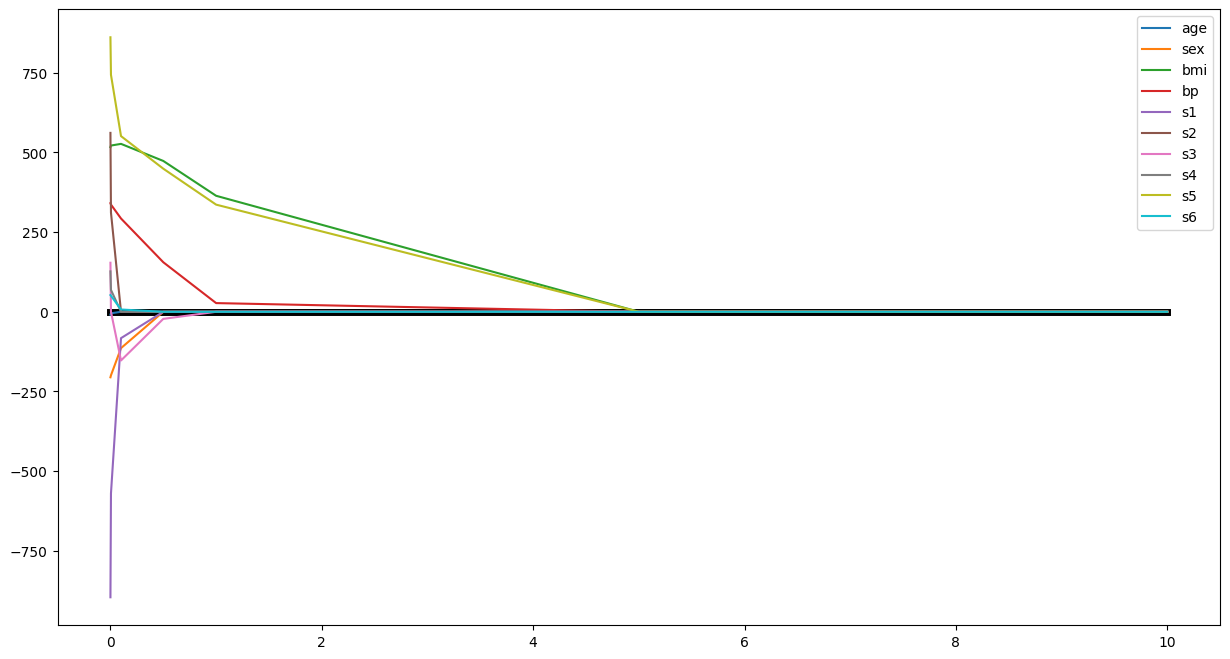

In [38]:

input_array = np.array(coefs).T

plt.figure(figsize=(15,8))
plt.plot(alphas, np.zeros(len(alphas)), color='black', linewidth=5)

for i in range(input_array.shape[0]):

    plt.plot(alphas, input_array[i], label=data.feature_names[i])

plt.legend()

In [39]:
# jitne bhi bde-bde columns the, woh teji se niche aa rhe hai,and, eventually ek point k baad sb 'zero' ho ja rhe hai.
# so, hme alpha=2 ke aapass hi valid value milega 'alpha' ka, b/c uske aage saare values 'zero' ho jayengi.

# see also,jinka coefficients bhut jyada hai, wo aur teji se niche gir rhe hai.(so that over-fitting na ho)

<h2> 3. Impact on Bias and Variance</h2>

In [40]:
# 'alpha' ko bdane se kya impact pdta hai 'bias' and 'variance' ke upr

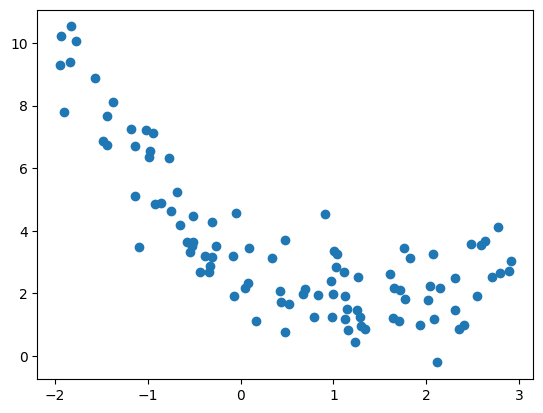

In [41]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [42]:
# Again, apply for train_test_split method

X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [43]:
import sys
!{sys.executable} -m pip install mlxtend


In [44]:
import mlxtend
print(mlxtend.__version__)

0.23.4


In [45]:
# Now, use 'polynomial_Regression' for this

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [46]:
# Now, we will use this library(mlxtend) to calculate 'bias_and_variance' 

from mlxtend.evaluate import bias_variance_decomp
     # yeh fxn kisi bhi particular 'lambda' value k liye,'bias_and_variance' calculate krke dega. 

from sklearn.linear_model import Lasso
import numpy as np

alphas = np.linspace(0, 30, 10)  # reduced for speed

loss, bias, variance = [], [], []

for i in alphas:
    reg = Lasso(alpha=i, max_iter=5000, tol=1e-3, random_state=123)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test,
        loss='mse',
        num_rounds=50,   # reduce bootstrap rounds
        random_seed=123
    )
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

C:\Users\munna\anaconda3\envs\profiling310\lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\munna\anaconda3\envs\profiling310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\munna\anaconda3\envs\profiling310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.079e+01, tolerance: 5.276e-01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeC

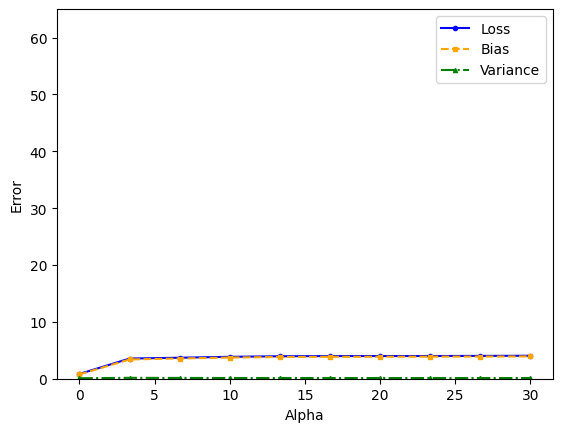

In [47]:
plt.plot(alphas, loss, label='Loss', color='blue', linestyle='-', marker='o', markersize=3)
plt.plot(alphas, bias, label='Bias', color='orange', linestyle='--', marker='s', markersize=3)
plt.plot(alphas, variance, label='Variance', color='green', linestyle='-.', marker='^', markersize=3)

plt.ylim(0, 65)
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.legend() 
plt.show()


<h2> 4. Effect of Regularization on Loss Function</h2>

In [48]:
# means agr hm 'alpha' ka value bdate jaye to 'Loss_Function' pe kya asr pdega -

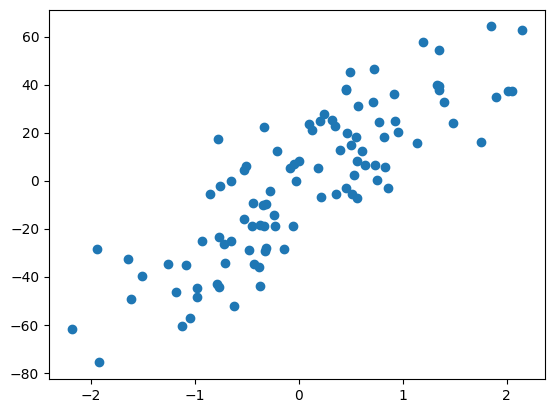

In [49]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13) 

plt.scatter(X,y)

In [50]:
# apply 'linear_regression' on this

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)

print(reg.intercept_)
print(reg.coef_)

-2.29474455867698
[27.82809103]


In [51]:
# look into the "NOTES" for better clarification :-

def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*abs(m)       # it gives the value of 'loss' --> L

In [52]:
def predict(m):
    return m*X - 2.29

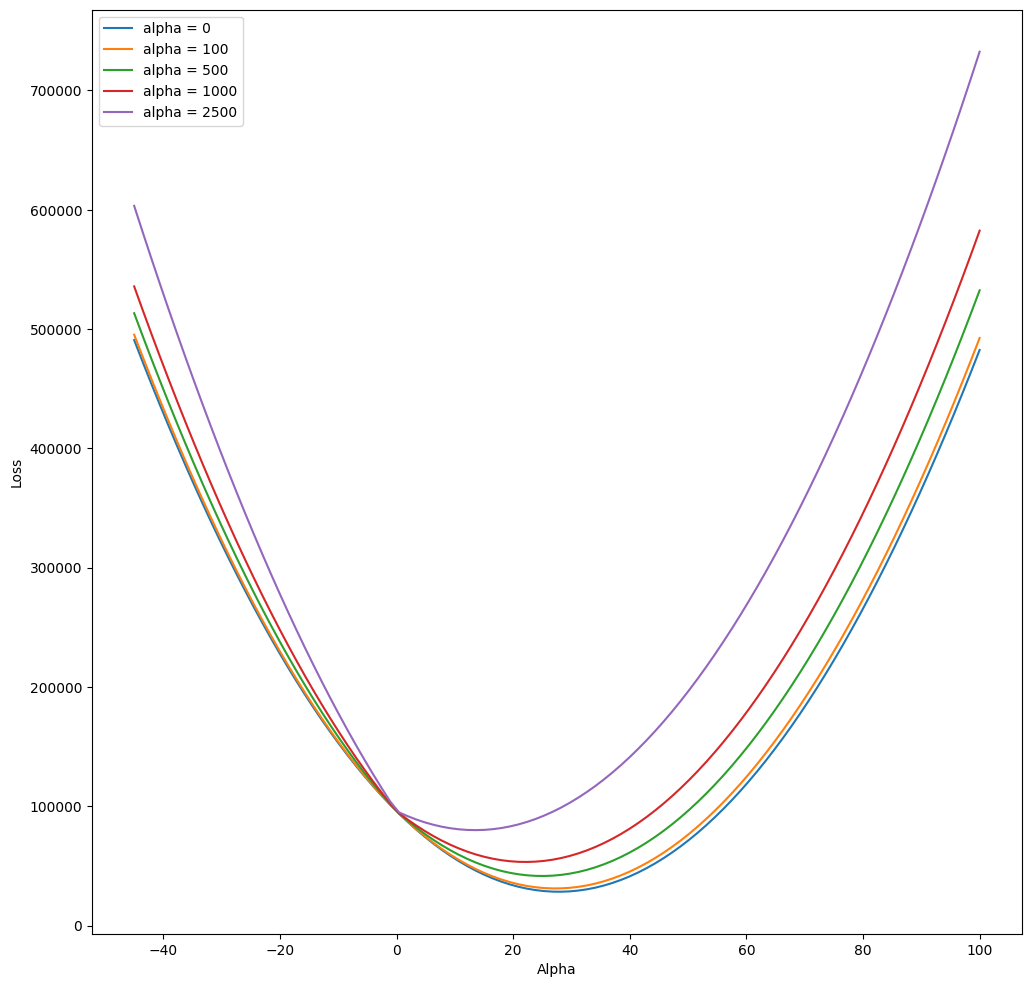

In [53]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(12,12))

for j in [0,100,500,1000,2500]:

    loss = []
    
    for i in range(m.shape[0]):

        loss_i = cal_loss(m[i], j)
        loss.append(loss_i) 
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()    

In [54]:
# so,when we apply this same thing on 'RidgeRegression' curve,then-
# wo apna shape retain krke dhire-dhire 'zero' ki trf bdh rha tha, but 'zero' kbhi nhi ho rha tha.

# But in "LassoRegression",yha pr curve phle apna shape loose kr rha hai,and,then 'zero' pe jake ruk ja rha hai.
# uske baad 'alpha' ki value kitni bhi bdha le, hm 'zero' ke piche nhi ja payenge(it is fixed at 'zero').